## Implementing ML Model Monitoring Pipelines

### Model Performance Drift:
**Description**: Setup a monitoring pipeline to track key performance metrics (e.g., accuracy, precision) of an ML model over time using a monitoring tool or dashboard.

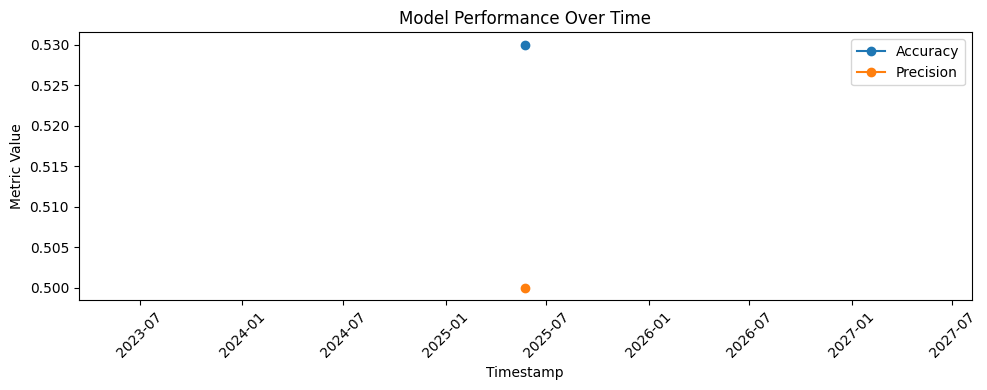

In [1]:
# write your code from here
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score
from datetime import datetime
import os
def evaluate_model(y_true, y_pred):
    return {
        "timestamp": datetime.now(),
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0)
    }
def log_metrics(metrics, log_path="model_metrics.csv"):
    df = pd.DataFrame([metrics])
    if os.path.exists(log_path):
        df.to_csv(log_path, mode='a', header=False, index=False)
    else:
        df.to_csv(log_path, index=False)
def visualize_metrics(log_path="model_metrics.csv"):
    df = pd.read_csv(log_path, parse_dates=["timestamp"])
    df.sort_values("timestamp", inplace=True)
    plt.figure(figsize=(10, 4))
    plt.plot(df["timestamp"], df["accuracy"], label="Accuracy", marker='o')
    plt.plot(df["timestamp"], df["precision"], label="Precision", marker='o')
    plt.ylabel("Metric Value")
    plt.xlabel("Timestamp")
    plt.title("Model Performance Over Time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
y_true = np.random.randint(0, 2, 100)
y_pred = np.random.randint(0, 2, 100)
metrics = evaluate_model(y_true, y_pred)
log_metrics(metrics)
visualize_metrics()

### Feature Distribution Drift:
**Description**: Monitor the distribution of your input features in deployed models to detect any significant shifts from training data distributions.

    feature       p_value  drift
0  feature1  2.856558e-20   True
1  feature2  4.002683e-71   True


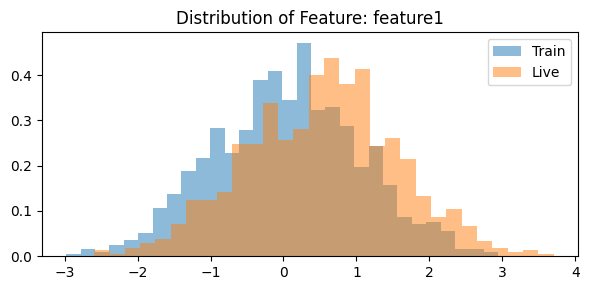

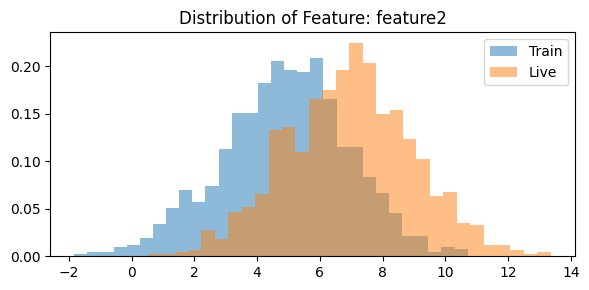

In [2]:
# write your code from here
#1
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
def calculate_feature_drift(train_df, live_df, threshold=0.05):
    drift_report = []
    for col in train_df.columns:
        stat, p_value = ks_2samp(train_df[col], live_df[col])
        drift_detected = p_value < threshold
        drift_report.append({
            "feature": col,
            "p_value": p_value,
            "drift": drift_detected
        })
    return pd.DataFrame(drift_report)
def plot_feature_distributions(train_df, live_df, features):
    for col in features:
        plt.figure(figsize=(6, 3))
        plt.hist(train_df[col], bins=30, alpha=0.5, label="Train", density=True)
        plt.hist(live_df[col], bins=30, alpha=0.5, label="Live", density=True)
        plt.title(f"Distribution of Feature: {col}")
        plt.legend()
        plt.tight_layout()
        plt.show()
train_data = pd.DataFrame({
    "feature1": np.random.normal(0, 1, 1000),
    "feature2": np.random.normal(5, 2, 1000)
})
live_data = pd.DataFrame({
    "feature1": np.random.normal(0.5, 1, 1000),
    "feature2": np.random.normal(7, 2, 1000)
})
drift_result = calculate_feature_drift(train_data, live_data)
print(drift_result)
plot_feature_distributions(train_data, live_data, drift_result["feature"].tolist())

### Anomaly Detection in Predictions:
**DEscription**: Implement an anomaly detection mechanism to flag unusual model
predictions. Simulate anomalies by altering input data.

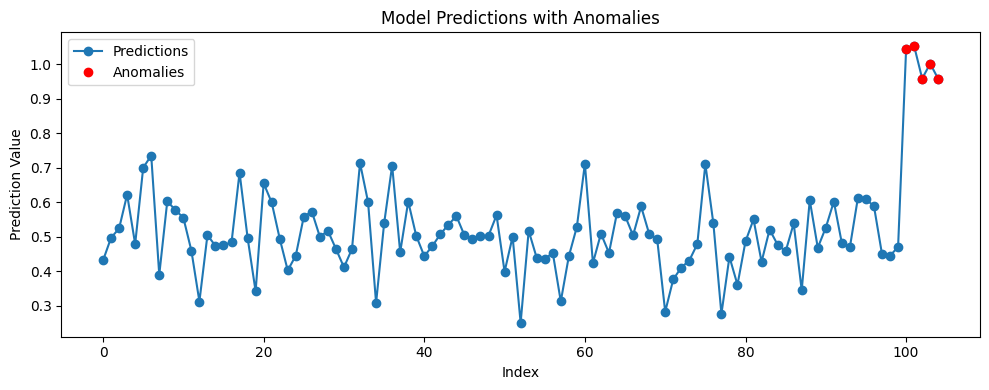

Anomalies detected at indices: [100 101 102 103 104]


In [3]:
# write your code from here
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
def simulate_predictions(n=100):
    normal_preds = np.random.normal(loc=0.5, scale=0.1, size=n)
    anomalies = np.random.normal(loc=1.0, scale=0.05, size=5)
    return np.concatenate([normal_preds, anomalies])
def detect_prediction_anomalies(preds, threshold=3.0):
    z_scores = zscore(preds)
    anomalies = np.abs(z_scores) > threshold
    return anomalies
def plot_predictions(preds, anomalies):
    plt.figure(figsize=(10, 4))
    plt.plot(preds, marker='o', label="Predictions")
    plt.plot(np.where(anomalies)[0], preds[anomalies], 'ro', label="Anomalies")
    plt.title("Model Predictions with Anomalies")
    plt.xlabel("Index")
    plt.ylabel("Prediction Value")
    plt.legend()
    plt.tight_layout()
    plt.show()
preds = simulate_predictions()
anomalies = detect_prediction_anomalies(preds)
plot_predictions(preds, anomalies)
anomaly_indices = np.where(anomalies)[0]
print("Anomalies detected at indices:", anomaly_indices)